In [1]:
%config InlineBackend.figure_format = "retina"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid',  {"grid.color": '.95'}) 
import statsmodels.api as sm
import statsmodels.formula.api as smf # New statsmodels package!

In [2]:
poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
food = pd.read_csv(poe5csv+'food.csv')

res = smf.ols('food_exp ~ income',data=food).fit()  # Simplified syntax!
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.4160     43.410      1.922      0.062      -4.463     171.295
income        10.2096      2.093      4.877      0.000       5.972      14.447


In [3]:
# Compare above with sm.OLS syntax and results
food0 = food.copy() 
food0['const'] = 1

res0 = sm.OLS(endog=food0['food_exp'],exog=food0[['const','income']]).fit()
print(res0.summary().tables[1])

del food0, res0  # delete the variables 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.4160     43.410      1.922      0.062      -4.463     171.295
income        10.2096      2.093      4.877      0.000       5.972      14.447


In [4]:
print(res.summary(alpha=0.1).tables[1])

                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
Intercept     83.4160     43.410      1.922      0.062      10.228     156.604
income        10.2096      2.093      4.877      0.000       6.680      13.739


In [5]:
print(res.conf_int(alpha=0.10)) 

                   0          1
Intercept  10.228444  156.60356
income      6.680496   13.73879


In [6]:
from scipy.stats import t

print(f"t critical value 97.5 percentile = {t.ppf(0.975,38):.3f}")

t critical value 97.5 percentile = 2.024


In [7]:
print(f"t(30 ) 95th percentile = {t.ppf(0.95,30):6.3f}")
print(f"t(20)   5th percentile = {t.ppf(0.05,20):6.3f}")
print(f"t(30) 2.5th percentile = {t.ppf(0.025,30):6.3f}")

t(30 ) 95th percentile =  1.697
t(20)   5th percentile = -1.725
t(30) 2.5th percentile = -2.042


In [8]:
print(res.params)
print(res.bse)
print(res.tvalues)

Intercept    83.416002
income       10.209643
dtype: float64
Intercept    43.410163
income        2.093264
dtype: float64
Intercept    1.921578
income       4.877381
dtype: float64


In [9]:
b1     = res.params.Intercept
b1se   = res.bse.Intercept
b2     = res.params.income
b2se   = res.bse.income

print(f"Intercept estimate = {b1:.4f}")
print(f"Standard error of intercept estimate = {b1se:.4f}")
print(f"Slope estimate = {b2:.4f}")
print(f"Standard error of slope estimate = {b2se:.4f}")

Intercept estimate = 83.4160
Standard error of intercept estimate = 43.4102
Slope estimate = 10.2096
Standard error of slope estimate = 2.0933


In [10]:
tc975 = t.ppf(0.975,38)

ub1 = b1 + tc975*b1se
lb1 = b1 - tc975*b1se
ub2 = b2 + tc975*b2se
lb2 = b2 - tc975*b2se

print(f"b1 95% interval estimate is {lb1:.4f} to {ub1:.4f}")
print(f"b2 95% interval estimate is {lb2:.4f} to {ub2:.4f}")

b1 95% interval estimate is -4.4633 to 171.2953
b2 95% interval estimate is 5.9721 to 14.4472


In [11]:
hypothesis = 'Intercept = 0'
print(res.t_test('Intercept=0'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            83.4160     43.410      1.922      0.062      -4.463     171.295


In [12]:
hypothesis = 'income = 0'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      4.877      0.000       5.972      14.447


In [13]:
r = [1, 0]
print(res.t_test(r))
r = [0, 1]
print(res.t_test(r))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            83.4160     43.410      1.922      0.062      -4.463     171.295
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      4.877      0.000       5.972      14.447


In [14]:
tstat0 = res.params.income/res.bse.income
print(f"t statistic for H0: beta2=0 = {tstat0:.4f}")
print(f"t(38) 95th percentile = {t.ppf(0.95,38):.4f}")

t statistic for H0: beta2=0 = 4.8774
t(38) 95th percentile = 1.6860


In [15]:
tstat1 = (res.params.income-5.5)/res.bse.income
print(f"t statistic for H0: beta2=5.5 is {tstat1:.4f}")
print(f"t(38) 99th percentile = {t.ppf(0.99,38):.4f}")

t statistic for H0: beta2=5.5 is 2.2499
t(38) 99th percentile = 2.4286


In [16]:
hypothesis = 'income = 5.5'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      2.250      0.030       5.972      14.447


In [17]:
tstat2 = (res.params.income-15)/res.bse.income
print(f"t statistic for H0: beta2 = 15 is {tstat2:.4f}")

t statistic for H0: beta2 = 15 is -2.2885


In [18]:
print(f"t(38) 95th percentile = {t.ppf(0.05,38):.4f}")

t(38) 95th percentile = -1.6860


In [19]:
hypothesis = 'income - 15'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093     -2.288      0.028       5.972      14.447


In [20]:
tstat3 = (res.params.income-7.5)/res.bse.income
print(f"t statistic for H0: beta2 = 7.5 is {tstat3:.4f}")

t statistic for H0: beta2 = 7.5 is 1.2945


In [21]:
print(f"t(38) 97.5th percentile = {t.ppf(0.975,38):.4f}")

t(38) 97.5th percentile = 2.0244


In [22]:
print(f"t(38)  2.5th percentile = {t.ppf(0.025,38):.4f}")

t(38)  2.5th percentile = -2.0244


In [23]:
hypothesis = 'income-7.5'
print(res.t_test(hypothesis))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            10.2096      2.093      1.294      0.203       5.972      14.447


In [24]:
print(f"p-value right tail test H0: beta2 = 5.5 is {t.sf(tstat1,38):.4f}")

p-value right tail test H0: beta2 = 5.5 is 0.0152


In [25]:
print(f"p-value left tail test H0: beta2 = 15 is {1-t.sf(tstat2,38):.4f}")

p-value left tail test H0: beta2 = 15 is 0.0139


In [26]:
print(f"p-value left tail test H0: beta2 = 15 is {t.cdf(tstat2,38):.4f}")

p-value left tail test H0: beta2 = 15 is 0.0139


In [27]:
p3 = 2 * t.sf(tstat3,38)  # see text for explanation of factor of 2
print(f"p-value two tail test H0: beta2 = 7.5 is {p3:.4f}")

p-value two tail test H0: beta2 = 7.5 is 0.2033


In [28]:
print(res.cov_params())

             Intercept     income
Intercept  1884.442263 -85.903157
income      -85.903157   4.381752


In [29]:
print(res.t_test('Intercept + income*20 = 0'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           287.6089     14.178     20.286      0.000     258.907     316.311


In [30]:
print(res.t_test('Intercept + income*20 = 250'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           287.6089     14.178      2.653      0.012     258.907     316.311


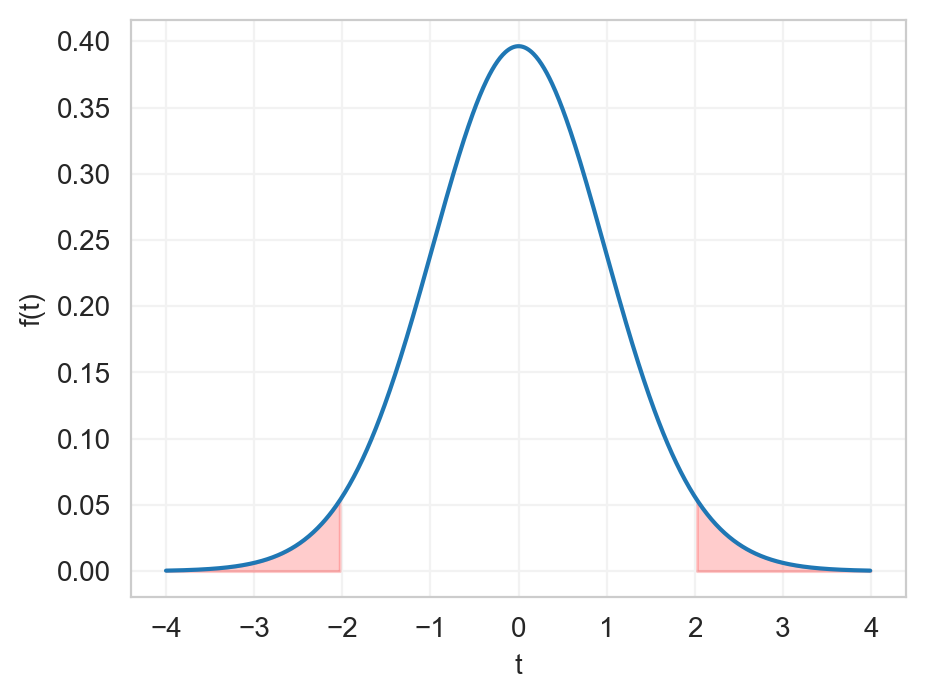

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid',  {"grid.color": '.95'})
from scipy.stats import norm, t

ndf = 38
tleft  = t.ppf(0.025,ndf)   # -2.024
tright = t.ppf(0.975,ndf)   #  2.024

left_tail  = np.arange(-4,tleft, 0.01) 
right_tail = np.arange(tright, 4, 0.01) 
x_all = np.arange(-4, 4, 0.01) 

yleft  = t.pdf(left_tail,ndf)
yright = t.pdf(right_tail,ndf)
y_all  = t.pdf(x_all,ndf)

fig, ax = plt.subplots()
sns.lineplot(x=x_all,y=y_all)
ax.fill_between(left_tail,yleft,0, color='r',alpha=0.2)
ax.fill_between(right_tail,yright,0, color='r',alpha=0.2)
ax.set_xlabel('t')
ax.set_ylabel('f(t)');

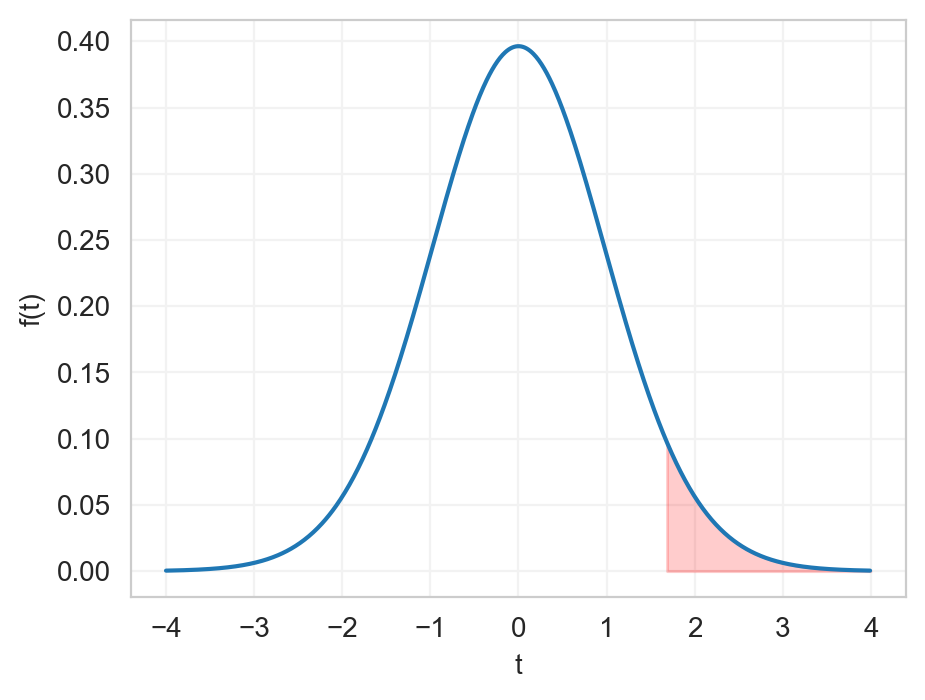

In [32]:
ndf = 38
tright = t.ppf(0.95,ndf)   #  1.686

right_tail = np.arange(tright, 4, 0.01) 
x_all = np.arange(-4, 4, 0.01) 

yright = t.pdf(right_tail,ndf)
y_all  = t.pdf(x_all,ndf)

fig, ax = plt.subplots()
sns.lineplot(x=x_all,y=y_all)
ax.fill_between(right_tail,yright,0, color='r',alpha=0.2)
ax.set_xlabel('t')
ax.set_ylabel('f(t)');

Successful interval estimates = 94.86%
True null hypothesis rejected = 5.09%


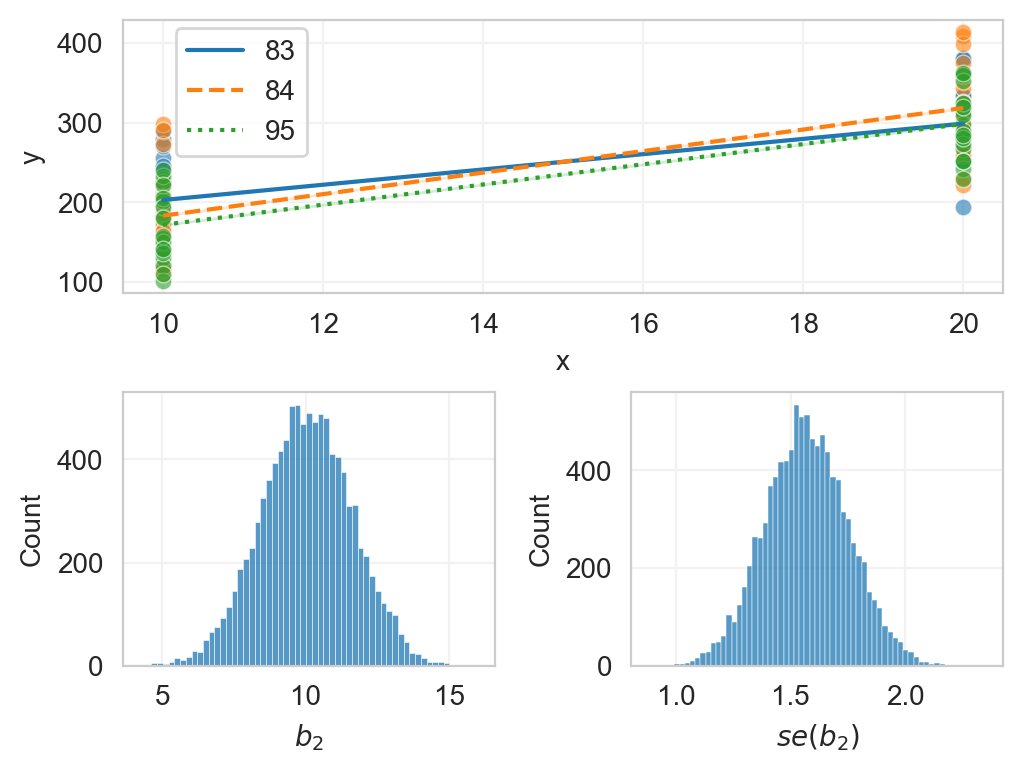

In [33]:
np.random.seed(42)
nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamp = 10000
tc975 = t.ppf(0.975,nobs-2)

b2 = []      # list of best-fit b1
b2se = []    # list of b2 std err
ub = []      # CI upper bound list
lb = []      # CI lower bound list
tstat = []   # t statistic list

df = pd.DataFrame(columns=['x','y'])
df.x = 20*[10] + 20*[20] # first 20 elements -> '10', second 20 -> '20'
y0 = beta1 + beta2*df.x  # first 20 elements ->'100', second 20 ->'300'

# Initialize plot regions
pltsims = [83,84,95]
lstyle = 96*['solid'] # kludge to get different linestyles on plot
lstyle[84] = 'dashed'
lstyle[95] = 'dotted'
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

for i in range(nsamp):
    df.y = y0 + sigma*np.random.randn(nobs)        # add 'noise'
    res = smf.ols('y ~ x',data=df).fit()
    b2.append(res.params.x)
    b2se.append(res.bse.x)
    ub.append(res.params.x+tc975*res.bse.x)
    lb.append(res.params.x-tc975*res.bse.x)
    tstat.append((res.params.x-beta2)/res.bse.x)
    if i in pltsims:  # show selected model results
        sns.scatterplot(x=df.x,y=df.y,ax=ax1,alpha=0.6)
        sns.lineplot(x=df.x,y=res.predict(),ax=ax1,label=str(i),
                    linestyle=lstyle[i])
        
lb = np.array(lb)          # convert to arrays
ub = np.array(ub)
tstat = np.array(tstat)  
cover = (lb < beta2) & (ub > beta2)
reject = tstat > t.ppf(0.95,nobs-2)

print(f"Successful interval estimates = {sum(cover)/nsamp*100:.2f}%")
print(f"True null hypothesis rejected = {sum(reject)/nsamp*100:.2f}%")
sns.histplot(b2,kde=False,ax=ax2)
ax2.set_xlabel(f"$b_2$")
sns.histplot(b2se,kde=False,ax=ax3)
ax3.set_xlabel(r"$se(b_2)$")
ax1.legend(loc=(.06,.5),prop={'size': 10});

In [34]:
print(" i    b2      b2se    tstat  reject    lb      ub   cover")
for i in range(80,100):
    print(f"{i:2} {b2[i]:7.3f} {b2se[i]:7.3f} {tstat[i]:8.3f}"\
      f"   {reject[i]!s:5s} {lb[i]:7.3f} {ub[i]:7.3f}  {cover[i]!s:5s}")

 i    b2      b2se    tstat  reject    lb      ub   cover
80   8.746   1.663   -0.754   False   5.380  12.112  True 
81  10.026   1.530    0.017   False   6.929  13.123  True 
82  12.713   1.817    1.493   False   9.034  16.392  True 
83   9.597   1.594   -0.253   False   6.371  12.823  True 
84  13.517   1.786    1.969   True    9.901  17.133  True 
85  11.507   1.594    0.946   False   8.281  14.734  True 
86  11.382   1.701    0.813   False   7.939  14.826  True 
87  10.501   1.623    0.309   False   7.214  13.787  True 
88  10.313   1.989    0.157   False   6.286  14.341  True 
89  12.022   1.701    1.189   False   8.580  15.465  True 
90   8.908   1.428   -0.765   False   6.017  11.798  True 
91  11.273   1.263    1.007   False   8.715  13.830  True 
92   8.885   1.744   -0.639   False   5.354  12.415  True 
93  10.896   1.749    0.512   False   7.355  14.438  True 
94  10.651   1.295    0.502   False   8.029  13.273  True 
95  12.677   1.321    2.026   True   10.002  15.352  Fals

Successful interval estimates = 95.20%
True null hypothesis rejected = 4.87%


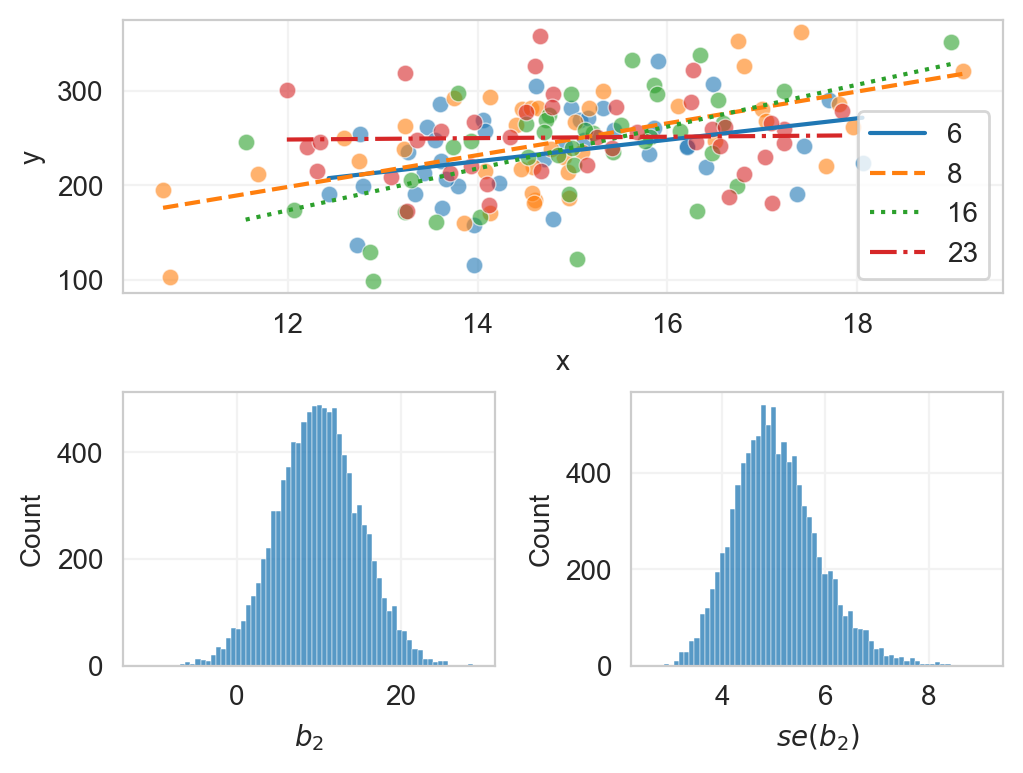

In [35]:
np.random.seed(42)
nobs = 40
beta1 = 100
beta2 = 10
sigma = 50
nsamp = 10000
tc975 = t.ppf(0.975,nobs-2)

b2 = []      # list of best-fit b1
b2se = []    # list of b2 std err
ub = []      # CI upper bound
lb = []      # CI lower bound
tstat = []   # t statistic
df = pd.DataFrame(columns=['x','y'])

# Initialize plot regions
pltsims = [6,8,16,23]
lstyle = 24*['solid'] # kludge to get different linestyles on plot
lstyle[8] = 'dashed'
lstyle[16] = 'dotted'
lstyle[23] = 'dashdot'
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

for i in range(nsamp):
    df.x = 15 + 1.6*np.random.randn(nobs)
    df.y = beta1 + beta2*df.x + sigma*np.random.randn(nobs)
    res = smf.ols('y ~ x',data=df).fit()
    b2.append(res.params.x)
    b2se.append(res.bse.x)
    ub.append(b2[-1]+tc975*b2se[-1])
    lb.append(b2[-1]-tc975*b2se[-1])
    tstat.append((res.params.x-beta2)/res.bse.x)
    if i in pltsims:  # show the first 10 best-fit lines with data
        sns.scatterplot(x=df.x,y=df.y,ax=ax1,alpha=0.6)
        sns.lineplot(x=df.x,y=res.predict(),ax=ax1,label=str(i),
                    linestyle=lstyle[i])

lb = np.array(lb)          # convert to arrays
ub = np.array(ub)
tstat = np.array(tstat)  
cover = (lb < beta2) & (ub > beta2)
reject = tstat > t.ppf(0.95,nobs-2)

print(f"Successful interval estimates = {sum(cover)/nsamp*100:.2f}%")
print(f"True null hypothesis rejected = {sum(reject)/nsamp*100:.2f}%")
sns.histplot(b2,kde=False,ax=ax2)
ax2.set_xlabel(f"$b_2$")
sns.histplot(b2se,kde=False,ax=ax3)
ax3.set_xlabel(r"$se(b_2)$")
ax1.legend(prop={'size': 10});

In [36]:
print(" i    b2      b2se    tstat  reject    lb      ub   cover")
for i in range(5,25):
    print(f"{i:2} {b2[i]:7.3f} {b2se[i]:7.3f} {tstat[i]:8.3f}"\
          f"   {reject[i]!s:>5s} {lb[i]:7.3f} {ub[i]:7.3f}  {cover[i]!s:>5s}")

 i    b2      b2se    tstat  reject    lb      ub   cover
 5  15.763   4.812    1.198   False   6.023  25.504   True
 6  11.336   4.864    0.275   False   1.490  21.181   True
 7  16.359   5.444    1.168   False   5.337  27.380   True
 8  16.785   3.753    1.808    True   9.186  24.383   True
 9  10.626   4.625    0.135   False   1.263  19.989   True
10  11.627   5.247    0.310   False   1.005  22.250   True
11  13.397   6.211    0.547   False   0.824  25.971   True
12  15.630   4.549    1.238   False   6.421  24.838   True
13  13.905   4.888    0.799   False   4.009  23.801   True
14  12.802   5.425    0.516   False   1.819  23.784   True
15   8.212   4.548   -0.393   False  -0.995  17.420   True
16  22.101   5.409    2.237    True  11.151  33.051  False
17   5.380   4.765   -0.969   False  -4.266  15.027   True
18  13.551   6.220    0.571   False   0.960  26.142   True
19  12.447   5.122    0.478   False   2.078  22.816   True
20  12.585   4.578    0.565   False   3.316  21.853   Tru

In [37]:
from scipy.stats import t
t.ppf(0.95,38)

1.685954460166737